In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go




In [50]:
df_merged = pd.read_csv('D:\\Projo\\Projet-Data-IA\\Merged_all_tables\\merged_final.csv', sep=',')

In [51]:

# def minutes_to_hours_minutes(minutes):
#     hours = int(minutes / 60)
#     remaining_minutes = minutes % 60
#     return f"{hours} heures {remaining_minutes} minutes"

# df_merged['runtimeMinutes'] = df_merged['runtimeMinutes'].apply(minutes_to_hours_minutes)
# # rename de la colonne runtimeMinutes à duration
# df_merged.rename(columns={'runtimeMinutes': 'duration'}, inplace=True)

In [52]:
# Jointures des tables title et merged_all_tables pour récupérer les valeurs de la colonne genres

# df_del_cols = pd.read_csv('D:\\Projo\\Projet-Data-IA\\title_del_cols.csv', sep=',')
# df_merged = pd.merge(df_merged, df_del_cols, left_on='titleId', right_on='tconst', how='left')

In [53]:
# def clean_actors_list(actors_list):
#     # Convertir la liste en un ensemble pour supprimer les doublons, puis trier
#     unique_actors = sorted(set(actors_list))
#     # Convertir l'ensemble trié en une chaîne de caractères séparée par des virgules
#     cleaned_list = ', '.join(unique_actors)
#     return cleaned_list

# # Appliquer la fonction à chaque élément de la colonne "Actors_Actresses"
# df_merged['Actors_Actresses'] = df_merged['Actors_Actresses'].apply(eval).apply(clean_actors_list)
# df_merged['production_companies_name'] = df_merged['production_companies_name'].apply(eval).apply(clean_actors_list)

# Suppression des colonnes inutiles pour l'analyse
df_merged.drop(columns=['overview', 'poster_path', 'backdrop_path', 'popularity', 'nconst_director'], inplace=True)
df_merged.dropna(inplace=True)

df_merged.head(10)

,titleId,title,averageRating,numVotes,startYear,runtimeMinutes,genre1,genre2,production_companies_name,Director_name,Actors_Actresses
0,tt0035423,Kate et Léopold,6.4,88939.0,2001.0,118.0,Comedy,Fantasy,"Miramax, Konrad Pictures",James Mangold,"Matthew Sussman, Bradley Whitford, Paxton Whit..."
1,tt0081455,Scanners,6.7,61542.0,1981.0,103.0,Horror,Sci-Fi,"Montreal Trust Company of Canada, Filmplan Int...",David Cronenberg,"Adam Ludwig, Lawrence Dane, Stephen Lack, Murr..."
2,tt0081633,"Bandits, bandits...",6.9,68140.0,1981.0,110.0,Adventure,Comedy,HandMade Films,Terry Gilliam,"Sean Connery, Ian Holm, John Cleese, Ralph Ric..."
3,tt0082010,Le Loup-garou de Londres,7.5,120045.0,1981.0,97.0,Comedy,Horror,"Universal Pictures, Guber/Peters Company, Amer...",John Landis,"Lila Kaye, Griffin Dunne, David Schofield, Pad..."
4,tt0082031,Arthur,6.9,31034.0,1981.0,97.0,Comedy,Romance,"Orion Pictures, Jack Rollins & Charles H. Joff...",Steve Gordon,"Ted Ross, Liza Minnelli, Dudley Moore, Jill Ei..."
5,tt0082045,Banana Joe,6.3,8842.0,1982.0,96.0,Action,Comedy,"Derby Cinematografica, Lisa Film",Steno,"Giorgio Bracardi, Enzo Garinei, Bud Spencer, N..."
6,tt0082085,Blow Out,7.4,62793.0,1981.0,108.0,Crime,Drama,"Cinema 77, Filmways Pictures",Brian De Palma,"John Aquino, Curt May, Deborah Everton, Peter ..."
7,tt0082089,La fièvre au corps,7.4,40026.0,1981.0,113.0,Crime,Drama,The Ladd Company,Lawrence Kasdan,"Mickey Rourke, William Hurt, Kathleen Turner, ..."
8,tt0082096,Le Bateau,8.4,263723.0,1981.0,149.0,Drama,War,"Radiant Film GmbH, WDR, Süddeutscher Rundfunk,...",Wolfgang Petersen,"Erwin Leder, Klaus Wennemann, Martin May, Herb..."
9,tt0082136,L'Équipée du Cannonball,6.2,39831.0,1981.0,95.0,Action,Comedy,"20th Century Fox, Orange Sky Golden Harvest, A...",Hal Needham,"Adrienne Barbeau, Roger Moore, Farrah Fawcett,..."


In [54]:
df_merged['genre1'].value_counts()

genre1
Action         1347
Drama           997
Comedy          946
Crime           403
Biography       393
Adventure       347
Horror          152
Animation        36
Mystery          19
Fantasy          18
Documentary       7
Thriller          5
Family            2
Sci-Fi            2
Music             1
Romance           1
History           1
Name: count, dtype: int64

In [55]:
df_merged.dtypes


titleId                       object
title                         object
averageRating                float64
numVotes                     float64
startYear                    float64
runtimeMinutes               float64
genre1                        object
genre2                        object
production_companies_name     object
Director_name                 object
Actors_Actresses              object
dtype: object

In [56]:
df_merged.describe()

,averageRating,numVotes,startYear,runtimeMinutes
count,4677.000000,4.677000e+03,4677.000000,4677.000000
mean,6.875732,1.400068e+05,2007.401112,113.667522
std,0.588777,2.205863e+05,11.225482,18.843952
min,6.000000,5.026000e+03,1981.000000,85.000000
25%,6.400000,2.400800e+04,1999.000000,100.000000
50%,6.800000,6.426500e+04,2010.000000,110.000000
75%,7.300000,1.620290e+05,2017.000000,123.000000
max,9.300000,2.878611e+06,2024.000000,238.000000


In [57]:
# Les 20 films les mieux notés de 1980 à 2024

df_sorted_avg =  df_merged.sort_values(by='averageRating', ascending=False)
df_sorted_avg.head()

,titleId,title,averageRating,numVotes,startYear,runtimeMinutes,genre1,genre2,production_companies_name,Director_name,Actors_Actresses
757,tt0111161,Les évadés,9.3,2878611.0,1994.0,142.0,Drama,Drama,Castle Rock Entertainment,Frank Darabont,"Larry Brandenburg, Mark Rolston, Clancy Brown,..."
2006,tt0468569,The Dark Knight : Le Chevalier noir,9.0,2861067.0,2008.0,152.0,Action,Crime,"Isobel Griffiths, Warner Bros. Pictures, DC Co...",Christopher Nolan,"Aaron Eckhart, Ron Dean, Cillian Murphy, Chris..."
681,tt0108052,La liste de Schindler,9.0,1445610.0,1993.0,195.0,Biography,Drama,Amblin Entertainment,Steven Spielberg,"Shmuel Levy, Caroline Goodall, Malgorzata Gebe..."
1198,tt0167260,Le Seigneur des anneaux : Le Retour du roi,9.0,1972573.0,2003.0,201.0,Action,Adventure,"New Line Cinema, WingNut Films, The Saul Zaent...",Peter Jackson,"Viggo Mortensen, Ian McKellen, Noel Appleby, D..."
750,tt0110912,Pulp Fiction,8.9,2211531.0,1994.0,154.0,Crime,Drama,"Jersey Films, Miramax, A Band Apart",Quentin Tarantino,"Samuel L. Jackson, John Travolta, Uma Thurman,..."


In [58]:
# Moyenne durée des 20 films les mieux notés
df_mean_avg = df_sorted_avg['runtimeMinutes'].head(20).mean()
df_mean_avg.round()

155.0

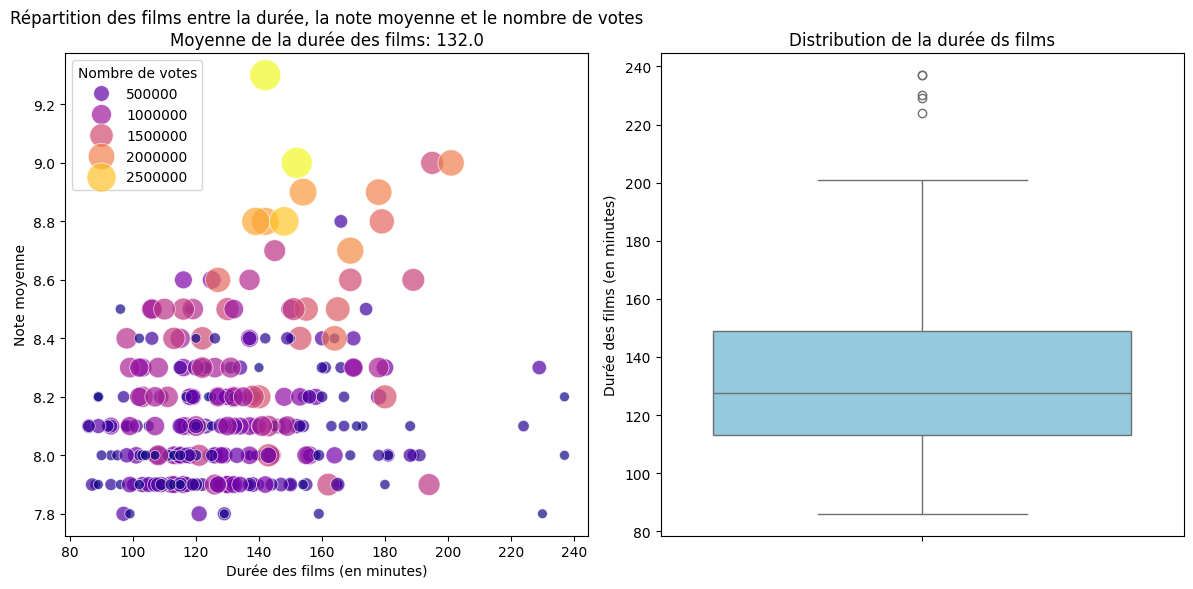

In [59]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Les n premiers films les mieux notés
df_top_20 = df_sorted_avg.sort_values(by='averageRating', ascending=False).head(300)

# Nuage de points avec 'runtimeMinutes' sur l'axe x, 'averageRating' sur l'axe y et 'numVotes' comme taille des points
sns.scatterplot(data=df_top_20, x='runtimeMinutes', y='averageRating', hue='numVotes', palette='plasma', size='numVotes', sizes=(50, 500), alpha=0.7, ax=axes[0])

# Barre de couleur pour expliquer la signification des couleurs
axes[0].legend(title='Nombre de votes', loc='upper left')

axes[0].set_xlabel('Durée des films (en minutes)')
axes[0].set_ylabel('Note moyenne')
axes[0].set_title(f'Répartition des films entre la durée, la note moyenne et le nombre de votes\nMoyenne de la durée des films: {df_top_20["runtimeMinutes"].mean().round()}')

# Graphique boxplot pour 'runtimeMinutes'
sns.boxplot(data=df_top_20, y='runtimeMinutes', ax=axes[1], color='skyblue')

# Ajouter des labels et un titre
axes[1].set_ylabel('Durée des films (en minutes)')
axes[1].set_title('Distribution de la durée ds films')


plt.tight_layout()
plt.show()



* On peut voir que la majorité des films de 500 000 à 1 000 000 de nombres de votes se situe entre 110 Minutes et 140 Minutes

In [60]:
# Top 20 des films les plus votés
df_sorted_numVotes =  df_merged.sort_values(by='numVotes', ascending=False)
df_sorted_numVotes.head()

,titleId,title,averageRating,numVotes,startYear,runtimeMinutes,genre1,genre2,production_companies_name,Director_name,Actors_Actresses
757,tt0111161,Les évadés,9.3,2878611.0,1994.0,142.0,Drama,Drama,Castle Rock Entertainment,Frank Darabont,"Larry Brandenburg, Mark Rolston, Clancy Brown,..."
2006,tt0468569,The Dark Knight : Le Chevalier noir,9.0,2861067.0,2008.0,152.0,Action,Crime,"Isobel Griffiths, Warner Bros. Pictures, DC Co...",Christopher Nolan,"Aaron Eckhart, Ron Dean, Cillian Murphy, Chris..."
2819,tt1375666,Inception,8.8,2541819.0,2010.0,148.0,Action,Adventure,"Warner Bros. Pictures, Legendary Pictures, Syn...",Christopher Nolan,"Cillian Murphy, Dileep Rao, Tom Hardy, Tom Ber..."
1125,tt0137523,Fight Club,8.8,2314328.0,1999.0,139.0,Drama,Drama,"Atman Entertainment, 20th Century Fox, Knicker...",David Fincher,"Zach Grenier, Helena Bonham Carter, George Mag..."
721,tt0109830,Forrest Gump,8.8,2248303.0,1994.0,142.0,Drama,Romance,"Wendy Finerman Productions, The Steve Tisch Co...",Robert Zemeckis,"Sally Field, Harold G. Herthum, Tom Hanks, Mic..."


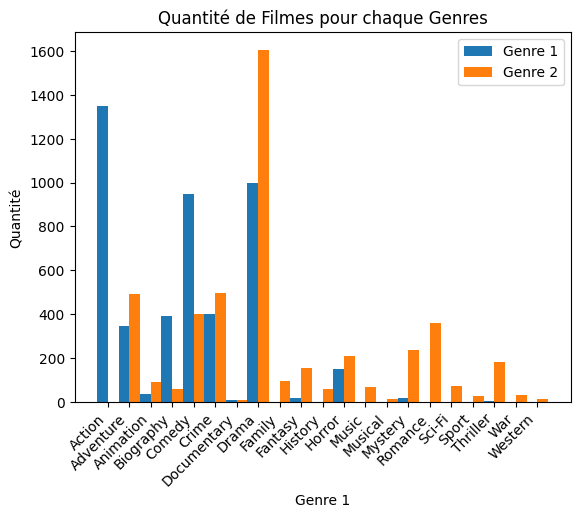

In [61]:
genero1_counts = df_merged['genre1'].value_counts()
genero2_counts = df_merged['genre2'].value_counts()

#Combinando os índices de ambas as séries para garantir que todos os gêneros estejam presentes
index = genero1_counts.index.union(genero2_counts.index)

#Preenchendo os valores ausentes com 0
genero1_counts = genero1_counts.reindex(index, fill_value=0)
genero2_counts = genero2_counts.reindex(index, fill_value=0)

#Plotando o gráfico de barras
fig, ax = plt.subplots()

#Configurando a largura das barras
bar_width = 0.5

#Calculando a posição das barras
x = range(len(index))

#Plotando as barras para Genero1
bars1 = ax.bar(x, genero1_counts.values, bar_width, label='Genre 1')

#Plotando as barras para Genero2 com um deslocamento de bar_width
bars2 = ax.bar([i + bar_width for i in x], genero2_counts.values, bar_width, label='Genre 2')

#Configurando os rótulos e ticks do eixo x
ax.set_xticks([i + bar_width / 2 for i in x])
ax.set_xticklabels(index, rotation=45, ha='right')

#Adicionando legendas e rótulos de eixo
ax.legend()
ax.set_xlabel('Genre 1')
ax.set_ylabel('Quantité')
ax.set_title('Quantité de Filmes pour chaque Genres')

plt.show()


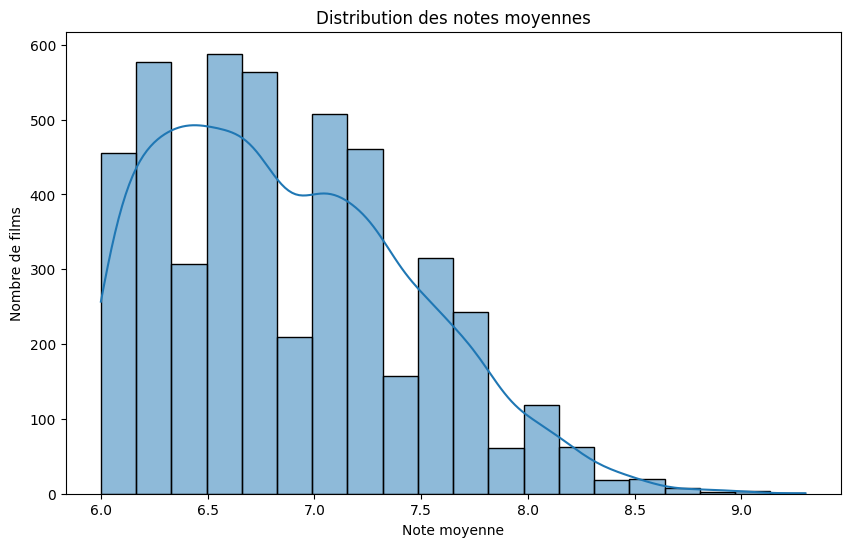

In [62]:
# Moyenne des notes
plt.figure(figsize=(10, 6))
sns.histplot(df_merged['averageRating'], bins=20, kde=True)
plt.title('Distribution des notes moyennes')
plt.xlabel('Note moyenne')
plt.ylabel('Nombre de films')
plt.show()


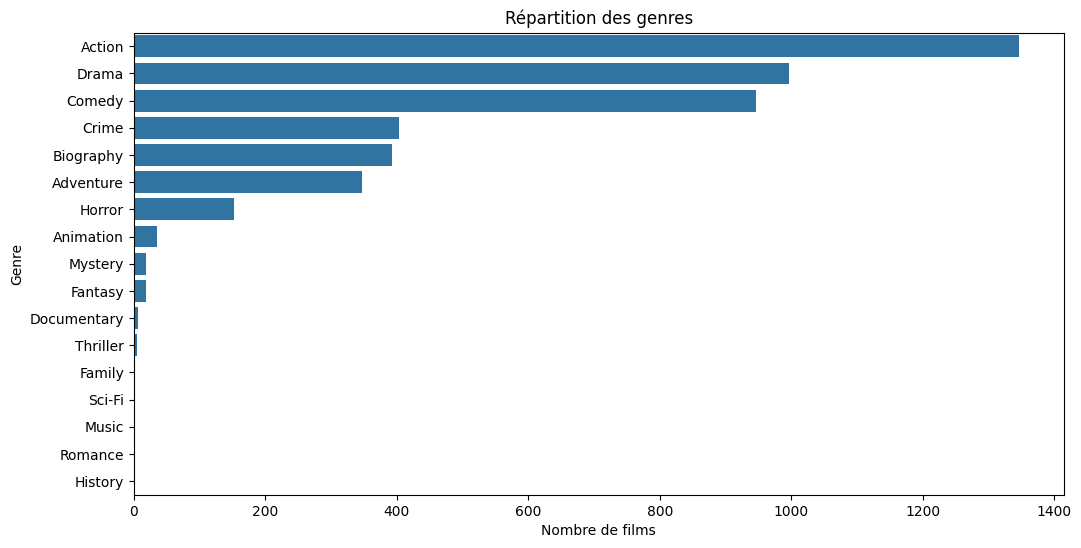

In [63]:
# Diagramme en barres pour les genres
plt.figure(figsize=(12, 6))
sns.countplot(y=df_merged['genre1'], order = df_merged['genre1'].value_counts().index)
plt.title('Répartition des genres')
plt.xlabel('Nombre de films')
plt.ylabel('Genre')
plt.show()


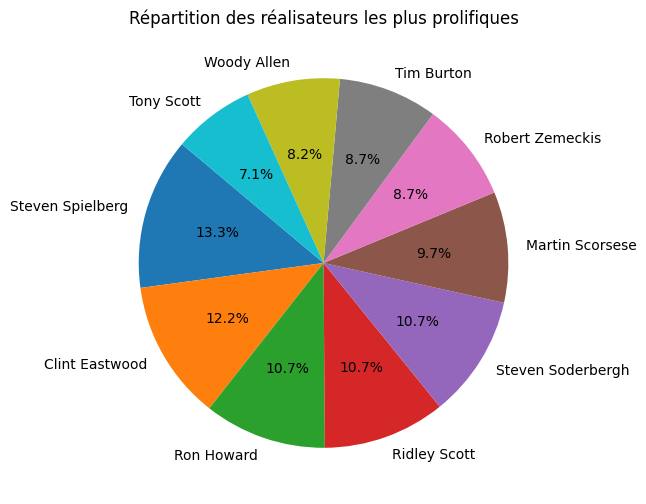

In [64]:
# les réalisateurs les plus sollicités
# Ajouter les années
# faire un graphique des meilleures réalisateurs par films a succés
top_directors = df_merged['Director_name'].value_counts().head(10)
plt.figure(figsize=(10, 6))
plt.pie(top_directors, labels=top_directors.index, autopct='%1.1f%%', startangle=140)
plt.title('Répartition des réalisateurs les plus prolifiques')
plt.show()

In [65]:
# Les acteurs et actrices les plus sollicités

# Diviser les noms des acteurs et actrices dans une liste
df_merged['Actors_Actresses'] = df_merged['Actors_Actresses'].str.split(',')

# Utiliser explode pour transformer la liste en une série avec une entrée pour chaque nom
df_actors = df_merged.explode('Actors_Actresses')

# Compter le nombre d'occurrences de chaque acteur/actrice
count_actors = df_actors['Actors_Actresses'].value_counts()

count_actors.head(10)


Actors_Actresses
Robert De Niro       47
Morgan Freeman       45
Tom Hanks            44
Liam Neeson          42
Willem Dafoe         39
Denzel Washington    38
Tom Cruise           38
Brad Pitt            37
Johnny Depp          37
Nicolas Cage         37
Name: count, dtype: int64

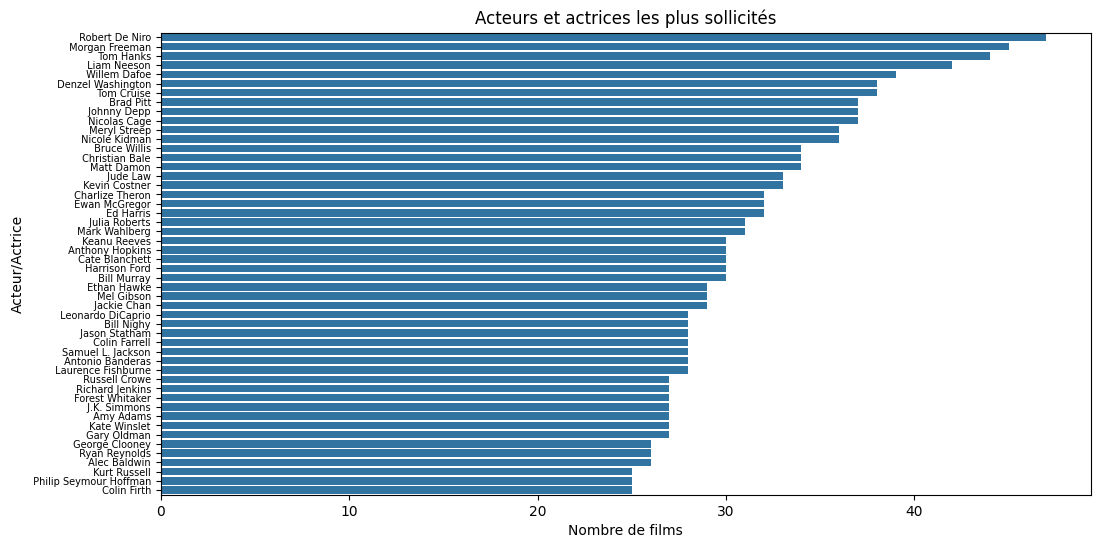

In [66]:
# Diagramme en barres pour les acteurs les plus sollicités
plt.figure(figsize=(12, 6))
sns.barplot(x=count_actors.head(50).values, y=count_actors.head(50).index)
plt.title('Acteurs et actrices les plus sollicités')
plt.xlabel('Nombre de films')
plt.ylabel('Acteur/Actrice')
plt.tick_params(axis='y', labelsize=7)
plt.show()


# TRIER LES ACTEURS PAR NOMBRE DE FILMS LES PLUS SOLICITES ET LES ANNÉES DE LEURS FILMS



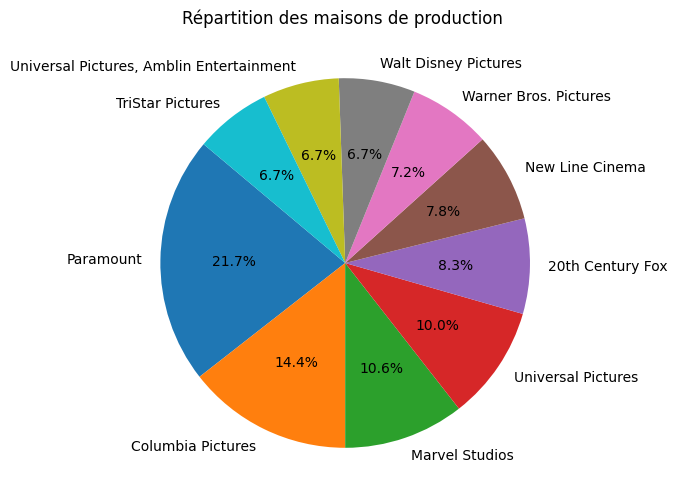

In [67]:
# Compagnies de production les plus populaires
# les réalisateurs les plus sollicités
# Ajouter les années
# faire un graphique des meilleures réalisateurs par films a succés
top_directors = df_merged['production_companies_name'].value_counts().head(10)
plt.figure(figsize=(10, 6))
plt.pie(top_directors, labels=top_directors.index, autopct='%1.1f%%', startangle=140)
plt.title('Répartition des maisons de production ')
plt.show()


In [68]:
# Nombres de films pa année de sortie de  film

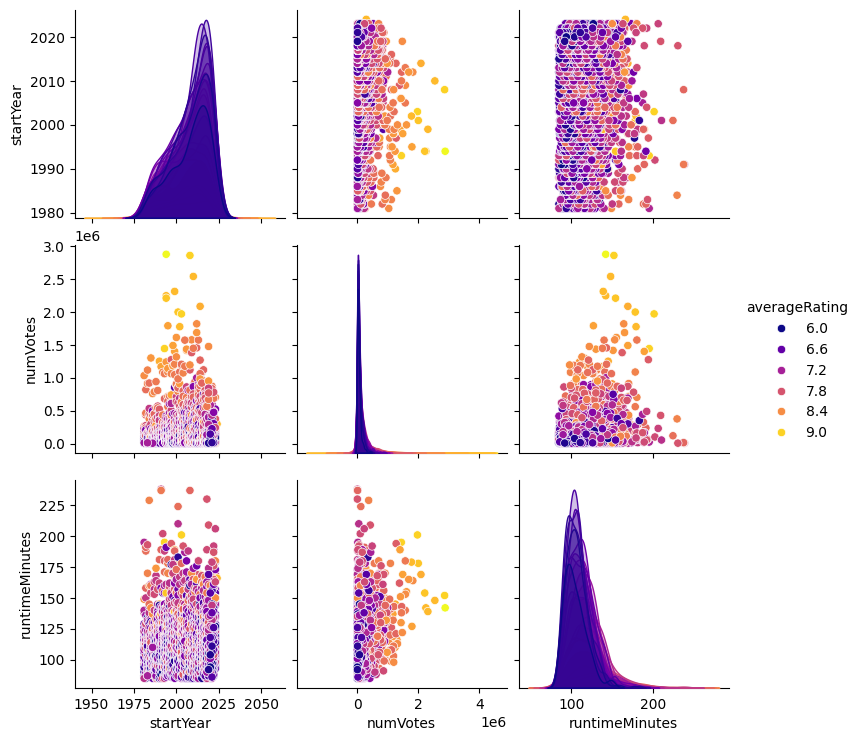

In [69]:
sns.pairplot(df_merged[['startYear', 'numVotes', 'averageRating', 'runtimeMinutes']], hue='averageRating', palette='plasma')